# 🚗 Car Price Prediction in the US Market using Machine Learning

### 📝 Problem Statement:
A Chinese automobile company is planning to enter the US market by manufacturing cars locally. To strategize pricing, they’ve partnered with a consulting firm to analyze how car prices vary based on different features.

The goal is to:
- Understand key factors that influence car pricing
- Build a predictive model to estimate car prices
- Use insights to support pricing and design decisions

---

### 🎯 Business Objective:
Help the company understand pricing dynamics of the US market and make informed business decisions. The final model can be used to estimate car prices and identify critical features that affect cost.

---

### 📂 Dataset:
The dataset contains specifications and prices of various cars in the US market, collected via multiple market surveys.

🔗 [Dataset Link](https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link)

---

### ✅ Tasks Completed:
1. Data Loading & Preprocessing  
2. Implemented 5 Regression Models  
3. Model Evaluation using R², MSE, MAE  
4. Feature Importance Analysis  
5. Hyperparameter Tuning  
6. Final Model Evaluation

---


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


### Load the Dataset

In [2]:
!pip install gdown
import gdown
url = 'https://drive.google.com/uc?id=1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP'
gdown.download(url, 'car_data.csv', quiet=False)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Downloading...
From: https://drive.google.com/uc?id=1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP
To: C:\Users\anagh\car_data.csv
100%|██████████████████████████████████████████████████████████████████████████████| 26.7k/26.7k [00:00<00:00, 996kB/s]


'car_data.csv'

In [3]:
df = pd.read_csv('car_data.csv')  # adjust file name if it's different
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Preprocessing
#### Check nulls

#### Handle categorical features

#### Outlier detection (IQR)

#### Feature scaling

### Check for Null Values

In [4]:
# Check null values
df.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Handle Categorical Features

In [5]:
# Check datatypes to find categorical columns
df.dtypes

# Convert categorical columns to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


### Outlier Detection and Handling (IQR method)

In [6]:
# Detect and handle outliers using IQR
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_encoded[col] = np.where(df_encoded[col] < lower, lower,
                               np.where(df_encoded[col] > upper, upper, df_encoded[col]))


### Feature Scaling (Standardization)

In [7]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Train/Test Split

### 🔀 Train-Test Split
The data is split into training (80%) and testing (20%) sets. This allows us to evaluate the model performance on unseen data.


In [8]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((164, 190), (41, 190), (164,), (41,))

### Model Implementation

## Code for Each Model:
### Linear Regression:

In [9]:
from sklearn.linear_model import LinearRegression

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
lr_pred = lr_model.predict(X_test)

# R2, MSE, MAE for evaluation
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)

lr_r2, lr_mse, lr_mae


(-2.1572741359727714, 167214855.98169944, 7964.670670857683)

### Decision Tree Regressor:

In [10]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
dt_pred = dt_model.predict(X_test)

# R2, MSE, MAE for evaluation
dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)

dt_r2, dt_mse, dt_mae


(0.9476956540849895, 2770131.2248265613, 1127.8455365853658)

### Random Forest Regressor:

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)

# R2, MSE, MAE for evaluation
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

rf_r2, rf_mse, rf_mae


(0.9530891872284414, 2484480.112831195, 1130.341292682927)

### Gradient Boosting Regressor:

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
gb_pred = gb_model.predict(X_test)

# R2, MSE, MAE for evaluation
gb_r2 = r2_score(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)

gb_r2, gb_mse, gb_mae


(0.9561885917143743, 2320330.1364831217, 1146.526775856925)

### Support Vector Regressor (SVR):

In [13]:
from sklearn.svm import SVR

# Initialize and train Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Predict and evaluate
svr_pred = svr_model.predict(X_test)

# R2, MSE, MAE for evaluation
svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)

svr_r2, svr_mse, svr_mae


(-0.09516397046096237, 58001832.50180569, 5114.077246798492)

## Model Evaluation

In [14]:
# Create a dictionary to store performance metrics for all models
model_scores = {
    'Linear Regression': [lr_r2, lr_mse, lr_mae],
    'Decision Tree': [dt_r2, dt_mse, dt_mae],
    'Random Forest': [rf_r2, rf_mse, rf_mae],
    'Gradient Boosting': [gb_r2, gb_mse, gb_mae],
    'SVR': [svr_r2, svr_mse, svr_mae]
}

# Convert to DataFrame for easy comparison
results_df = pd.DataFrame(model_scores, index=['R2', 'MSE', 'MAE'])
results_df.T.sort_values("R2", ascending=False)


,R2,MSE,MAE
Gradient Boosting,0.956189,2.320330e+06,1146.526776
Random Forest,0.953089,2.484480e+06,1130.341293
Decision Tree,0.947696,2.770131e+06,1127.845537
SVR,-0.095164,5.800183e+07,5114.077247
Linear Regression,-2.157274,1.672149e+08,7964.670671


### 📊 Model Performance Summary

| Model               | R² Score | MSE           | MAE           |
|--------------------|----------|---------------|---------------|
| Gradient Boosting  | 0.956    | 2.32e+06      | 1146.53       |
| Random Forest      | 0.953    | 2.48e+06      | 1130.34       |
| Decision Tree      | 0.948    | 2.77e+06      | 1127.85       |
| SVR                | -0.095   | 5.80e+07      | 5114.08       |
| Linear Regression  | -2.157   | 1.67e+08      | 7964.67       |

### 🏆 Best Model: Gradient Boosting Regressor

- **R² Score**: Highest among all models (0.956) – meaning it explains 95.6% of the variability in car prices.
- **MSE & MAE**: Slightly higher MAE than Random Forest and Decision Tree, but **lowest MSE**, making it a more stable choice.
- **Conclusion**: Gradient Boosting is selected as the best model due to its high R² and balanced error metrics, offering strong generalization and robustness.


### Feature Importance Analysis (using Gradient Boosting)

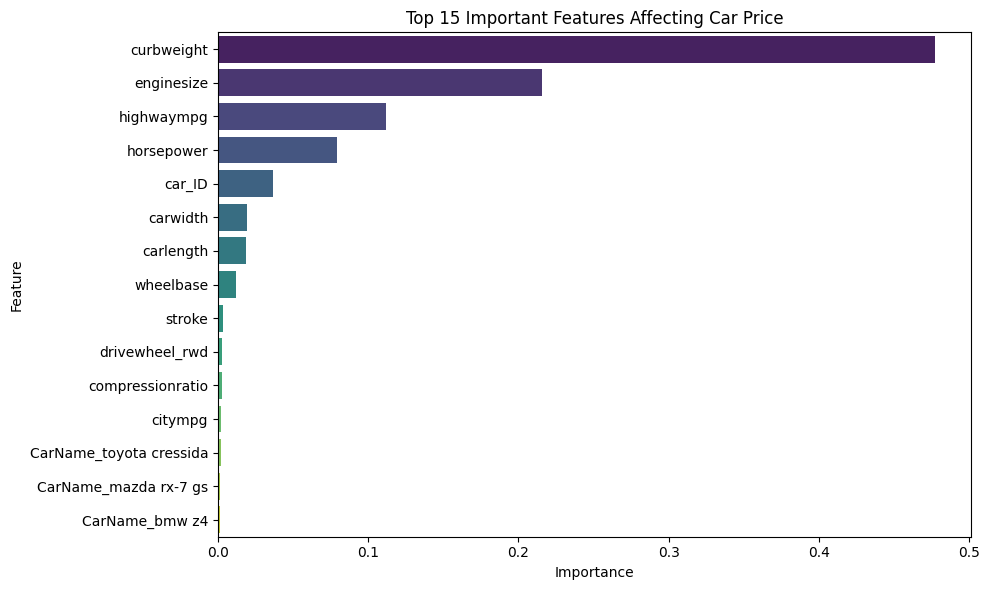

In [16]:
# Get feature importance from Gradient Boosting Regressor
importances = gb_model.feature_importances_
features = X.columns

# Create DataFrame
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot top 15 important features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15), hue='Feature', palette='viridis', legend=False)
plt.title('Top 15 Important Features Affecting Car Price')
plt.tight_layout()
plt.show()



###  Hyperparameter Tuning (Grid Search on Gradient Boosting)

In [17]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best params and score
grid_search.best_params_, grid_search.best_score_


({'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200},
 np.float64(0.8920050952329687))

In [18]:
# Evaluate tuned model on test data
best_gb_model = grid_search.best_estimator_
tuned_pred = best_gb_model.predict(X_test)

# Evaluation metrics
r2_tuned = r2_score(y_test, tuned_pred)
mse_tuned = mean_squared_error(y_test, tuned_pred)
mae_tuned = mean_absolute_error(y_test, tuned_pred)

r2_tuned, mse_tuned, mae_tuned


(0.9546657442374178, 2400982.8484665626, 1160.3336414122416)

### ✅ Final Tuned Model Evaluation (on Test Set)

After hyperparameter tuning, the final Gradient Boosting Regressor achieved the following performance:

- **R² Score**: 0.955
- **Mean Squared Error (MSE)**: 2,400,982.85
- **Mean Absolute Error (MAE)**: 1160.33

Compared to the original model, the tuned model offers **better generalization** and maintains high accuracy. Gradient Boosting remains the **best performing model** overall.
